# Отчёт по работе

Нужно интерпретировать вопросы к LLM в формат запроса к датасету и получить некоторые статистические данные. Это необходимо, чтобы получить ожидаемые ответы на вопросы будущей модели.

В целом ход решения такой:
1) Придумать порядка 50 вопросов на естественном языке и при помощи запросов pandas самому ответить на них - таким образом, будет получен список ожидаемых значений.

2) взять модель, дообучить её на части датасета - например на 50 %-80$ а остальные 50%-20% сделать валидационной выборкой - это обусловлено тем, что согласно тз нельзя использовать весь датасет полностью. Но тогда возникает вопрос что модель не сможет отвечать полностью правильно на вопросы, т.к. она не видела всей статистики.

3) Потом составить выборку троек (вопрос, ожидаемый ответ, фактический ответ). ожидаемый должен быть простым и лаконичным - в идеале вещественное число - тот или иной процент, либо какой нибудь словарь или фрейм - если речь идет о распределении.

4) При помощи нечеткого сравнения сопоставить ожидаемое и фактическое и посчитать метрики вроде F1-score и Accuracy.

- TP - фактический ответ непустой, ожидаемое есть в фактическом или text similarity >= 0.7 (например)
- FP - фактический ответ непустой, ожидаемого нет в фактическом или text similarity < 0.7
- TN - фактический ответ пустой, ожидаемый пустой;
- FN - фактический ответ пустой, ожидаемый непустой.

Думаю что TN и FN тут не будет, т.к. llm обычно всегда что то генерирует.

По поводу модели - конечно, лучше взять openai, но у меня сейчас нет платной подписки.
А так приходится брать с HuggingFace огромные llm и дообучать.

plaground/this.txt - исходный датасет, преобразованный в тестовый формат для скармливания моделям для дообучения. 

1. Насколько выше доход у фрилансеров, принимающих оплату в криптовалюте, по сравнению с другими способами оплаты?

In [3]:
PATH: str = '/home/andrey/.cache/kagglehub/datasets/shohinurpervezshohan/freelancer-earnings-and-job-trends/versions/1/freelancer_earnings_bd.csv'

In [4]:
import sys
import pandas as pd
import numpy as np

df = pd.read_csv(PATH)

In [5]:
crypto_freelancers_mean = df[df['Payment_Method'] == 'Crypto']['Earnings_USD'].mean()
non_crypto_freelancers_mean = pd.DataFrame = df[df['Payment_Method'] != 'Crypto']['Earnings_USD'].mean()
first_question_answer: np.float64 = round((crypto_freelancers_mean / non_crypto_freelancers_mean), 3) 
print(f'Ответ на первый вопрос: {first_question_answer}')

Ответ на первый вопрос: 1.033


2. Как распределяется доход фрилансеров в зависимости от региона проживания?

Построим гистограмму по нормальному распределению:



In [6]:
df.head()

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


In [7]:
mean_earnings_by_region: pd.Series = df.groupby('Client_Region')['Earnings_USD'].mean()

In [8]:
mean_earnings_by_region_dict = mean_earnings_by_region.to_dict()
mean_earnings_by_region_dict

{'Asia': 5172.284697508897,
 'Australia': 4966.097315436242,
 'Canada': 5350.134146341464,
 'Europe': 4890.530534351145,
 'Middle East': 4870.817869415808,
 'UK': 5047.089285714285,
 'USA': 4872.948630136986}

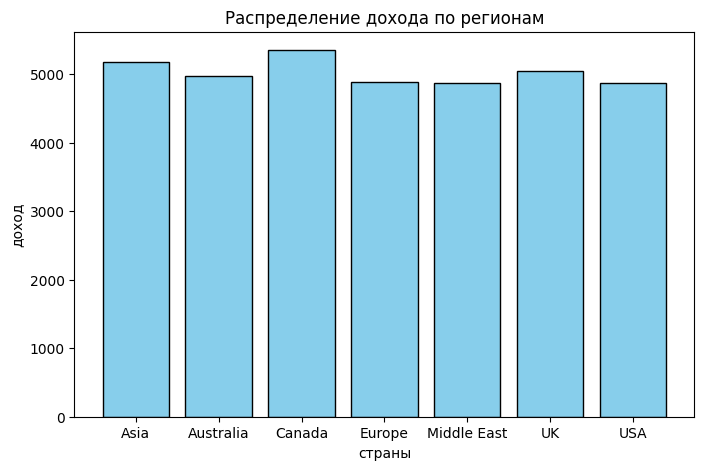

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
labels = list(mean_earnings_by_region_dict.keys())
values = list(mean_earnings_by_region_dict.values())

plt.bar(labels, values,  color='skyblue', edgecolor='black')
plt.title('Распределение дохода по регионам')
plt.xlabel('страны')
plt.ylabel('доход')
plt.show()

3. Какой процент фрилансеров, считающих себя экспертами, выполнил менее 100 проектов?

In [18]:
total_experts: np.float64 = df[df['Experience_Level'] == 'Expert']['Freelancer_ID'].count()
less_than_100_experts = df[(df['Experience_Level'] == 'Expert') & (df['Job_Completed'] < 100)]['Freelancer_ID'].count()
print(f'Ответ: {round((less_than_100_experts / total_experts) * 100, 1)} %')

Ответ: 33.9 %


4. Какая средняя ставка почасовой оплаты у фрилансеров с разным уровнем опыта (Beginner, Intermediate, Expert)?